# Lection 3

In [50]:
import pandas as pd
from matplotlib import pyplot as plt

import seaborn as sns

In [51]:
df = pd.read_csv('./data/telecom_churn.csv')

In [52]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [53]:
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [54]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [55]:
df['Churn'] = df['Churn'].astype('int')

In [56]:
state = df.pop('State')

### Split the DateFrame into a matrix X and vector y which form the tainin set

In [57]:
X, y = df.drop('Churn', axis=1), df['Churn']

In [58]:
X.shape, y.shape

((3333, 18), (3333,))

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_holdout, y_train, y_holdout = \
    train_test_split(X, y, test_size=.3, random_state=17)

In [61]:
X_train.shape, X_holdout.shape

((2333, 18), (1000, 18))

In [62]:
from sklearn.tree import DecisionTreeClassifier


In [63]:
tree = DecisionTreeClassifier(random_state=17)

In [64]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=17)

#### Cross-validation

In [92]:
from sklearn.model_selection import cross_val_score

In [82]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [108]:
cv_accuracies_by_depth, ho_accuracies_by_depth = [], []

max_depth_values = np.arange(2, 10)

# for each value of max depth
for max_depth in max_depth_values:
    tree = DecisionTreeClassifier(random_state=17, max_depth=max_depth)
    # perform cross-validation
    val_scores = cross_val_score(estimator=tree, X=X_train, y=y_train, cv=skf)
    cv_accuracies_by_depth.append(val_scores.mean())
    # assess the model with the holdout set
    tree.fit(X_train, y_train)
    
    cuur_ho_pred = tree.predict(X_holdout)
    
    ho_accuracies_by_depth.append(accuracy_score(y_holdout, cuur_ho_pred))

In [100]:
accuracies_by_depth

[0.8769848636626811,
 0.9018352923877181,
 0.9211292975893981,
 0.9335600261003023,
 0.9361296192480539,
 0.936563398921065,
 0.9382746229701041,
 0.9318432879028775]

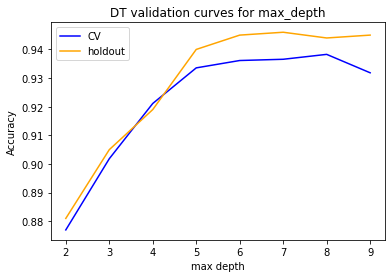

In [111]:
plt.plot(max_depth_values, cv_accuracies_by_depth, label='CV', c='blue')
plt.plot(max_depth_values, ho_accuracies_by_depth, label='holdout', c='orange');
plt.legend();
plt.xlabel('max depth')
plt.ylabel('Accuracy')
plt.title('DT validation curves for max_depth');

In [94]:
val_score = cross_val_score(estimator=tree, X=X_train, y=y_train, cv=skf)

In [95]:
val_score.mean()

0.9104125502017257

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
pred_holdout = tree.predict(X_holdout)

In [67]:
pred_holdout.shape, y_holdout.shape

((1000,), (1000,))

In [68]:
accuracy_score(y_holdout, pred_holdout)

0.921

In [69]:
import numpy as np

In [70]:
y.value_counts(normalize=True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64

In [71]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [81]:
params = {'max_depth': np.arange(2, 11), 'min_samples_leaf': np.arange(1, 11)}

In [82]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [83]:
best_tree = GridSearchCV(estimator=tree, param_grid=params, cv=skf, n_jobs=-1,
                        verbose=1)

In [84]:
best_tree.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    1.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=17), n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             verbose=1)

In [85]:
best_tree.best_params_

{'max_depth': 6, 'min_samples_leaf': 4}

In [86]:
best_tree.best_estimator_


DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, random_state=17)

## Cross-Validation assessment of model quality
    

In [89]:
best_tree.best_score_
    

0.9438485079633493

In [90]:
pred_holdout_better = best_tree.predict(X_holdout)

## Holdout assessment of model quality
    

In [91]:
accuracy_score(y_holdout, pred_holdout_better)

0.94

In [112]:
from sklearn.tree import export_graphviz

In [117]:
export_graphviz(decision_tree=best_tree.best_estimator_,
               out_file='tree.dot', filled=True, 
                feature_names=df.drop('Churn', axis=1).columns)

In [118]:
!ls *.dot

tree.dot


In [119]:
!cat tree.dot


digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="Total day minutes <= 264.45\ngini = 0.255\nsamples = 2333\nvalue = [1983, 350]", fillcolor="#ea975c"] ;
1 [label="Customer service calls <= 3.5\ngini = 0.206\nsamples = 2182\nvalue = [1927, 255]", fillcolor="#e89253"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="International plan <= 0.5\ngini = 0.149\nsamples = 2004\nvalue = [1842, 162]", fillcolor="#e78c4a"] ;
1 -> 2 ;
3 [label="Total day charge <= 38.185\ngini = 0.096\nsamples = 1828\nvalue = [1736, 92]", fillcolor="#e68843"] ;
2 -> 3 ;
4 [label="Total eve charge <= 27.965\ngini = 0.056\nsamples = 1570\nvalue = [1525, 45]", fillcolor="#e6853f"] ;
3 -> 4 ;
5 [label="Total day calls <= 121.5\ngini = 0.054\nsamples = 1562\nvalue = [1519, 43]", fillcolor="#e6853f"] ;
4 -> 5 ;
6 [label="gini = 0.044\nsamples = 1336\nvalue = [1306, 30]", fillcolor="#e6843e"] ;
5 -> 6 ;
7 [label="gini = 0.108\nsamples = 226\nvalue = [213, 13]", fillcolor

In [138]:
tree = DecisionTreeClassifier(random_state=17, max_depth=3).fit(X_train, y_train)

In [139]:
export_graphviz(decision_tree=tree,
               out_file='tree3.dot', filled=True, 
                feature_names=df.drop('Churn', axis=1).columns)

In [140]:
!cat tree3.dot

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="Total day minutes <= 264.45\ngini = 0.255\nsamples = 2333\nvalue = [1983, 350]", fillcolor="#ea975c"] ;
1 [label="Customer service calls <= 3.5\ngini = 0.206\nsamples = 2182\nvalue = [1927, 255]", fillcolor="#e89253"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="International plan <= 0.5\ngini = 0.149\nsamples = 2004\nvalue = [1842, 162]", fillcolor="#e78c4a"] ;
1 -> 2 ;
3 [label="gini = 0.096\nsamples = 1828\nvalue = [1736, 92]", fillcolor="#e68843"] ;
2 -> 3 ;
4 [label="gini = 0.479\nsamples = 176\nvalue = [106, 70]", fillcolor="#f6d4bc"] ;
2 -> 4 ;
5 [label="Total day charge <= 27.185\ngini = 0.499\nsamples = 178\nvalue = [85, 93]", fillcolor="#eef7fd"] ;
1 -> 5 ;
6 [label="gini = 0.209\nsamples = 76\nvalue = [9, 67]", fillcolor="#54aae8"] ;
5 -> 6 ;
7 [label="gini = 0.38\nsamples = 102\nvalue = [76, 26]", fillcolor="#eeac7d"] ;
5 -> 7 ;
8 [label="Voice mail plan <= 0.5\ngini = 0.

In [141]:
from io import StringIO
from ipywidgets import Image
import pydotplus

In [142]:
dot_data = StringIO()
export_graphviz(decision_tree=tree,
               out_file=dot_data, filled=True, 
                feature_names=df.drop('Churn', axis=1).columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())


InvocationException: GraphViz's executables not found